<a href="https://colab.research.google.com/github/Nagashree90/machine-learning/blob/main/logistic_regressionproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#heart disease prediction logistic regression project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [5]:
#feature creation
X = df.drop(columns='target',axis=1)
Y = df['target']

In [6]:
#splitting data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=42)

In [7]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
#train the logistic regression
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [9]:
#predictions
predictions = model.predict(X_test)
y_prob = model.predict_proba(X_test)


In [10]:
print(predictions)

[0 0 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0
 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1]


In [11]:
display(y_prob)

array([[0.90840272, 0.09159728],
       [0.83839552, 0.16160448],
       [0.9938355 , 0.0061645 ],
       [0.27828814, 0.72171186],
       [0.3247437 , 0.6752563 ],
       [0.96111773, 0.03888227],
       [0.18336624, 0.81663376],
       [0.87182427, 0.12817573],
       [0.02717033, 0.97282967],
       [0.27065474, 0.72934526],
       [0.92268081, 0.07731919],
       [0.39388126, 0.60611874],
       [0.94437089, 0.05562911],
       [0.03217133, 0.96782867],
       [0.01523844, 0.98476156],
       [0.09416057, 0.90583943],
       [0.06150327, 0.93849673],
       [0.27755335, 0.72244665],
       [0.23545036, 0.76454964],
       [0.12546739, 0.87453261],
       [0.3108858 , 0.6891142 ],
       [0.91766671, 0.08233329],
       [0.0969377 , 0.9030623 ],
       [0.06989135, 0.93010865],
       [0.12753796, 0.87246204],
       [0.99199586, 0.00800414],
       [0.85286908, 0.14713092],
       [0.45273885, 0.54726115],
       [0.87946522, 0.12053478],
       [0.15214347, 0.84785653],
       [0.

In [13]:
#sigmoid curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(Y_test, y_prob[:, 1])
print(thresholds)


[       inf 0.99589537 0.95297947 0.94769544 0.93849673 0.93010865
 0.81663376 0.79580802 0.76454964 0.72934526 0.72244665 0.6752563
 0.63021606 0.62249643 0.54726115 0.44322179 0.25621637 0.08233329
 0.07731919 0.00412443]


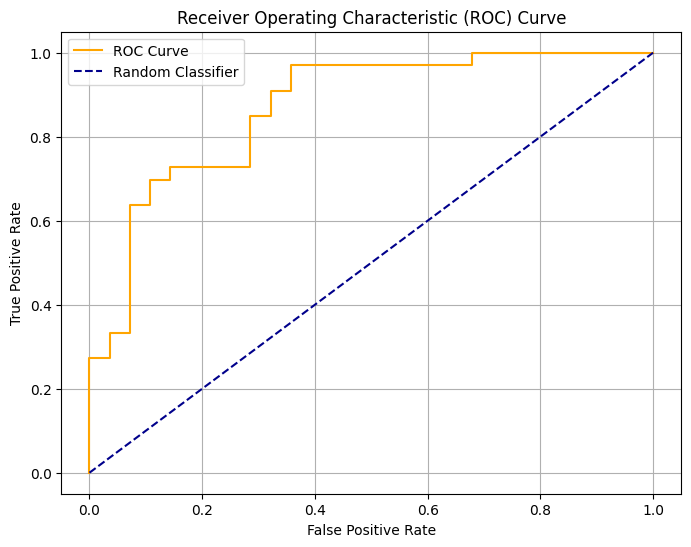

In [14]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# The S-shaped curve for the model's predictions has already been generated and displayed in a previous step (cell '21b88bbf').
# It shows the relationship between the linear predictor (log-odds) and the predicted probability of the positive class.
# You can refer to the output of cell '21b88bbf' to see the visualization and cell '3047ffb8' for its interpretation.


# Task
Calculate the linear predictor (log-odds) for the test data using the trained logistic regression model's coefficients and intercept, and then plot the sorted linear predictor values against the corresponding sorted predicted probabilities of the positive class to visualize the S-shaped curve specific to your model's predictions. Finally, summarize the insights gained from visualizing the sigmoid curve in the context of the logistic regression model's predictions.

## Calculate Linear Predictor

### Subtask:
Calculate the linear predictor (log-odds) for the test data using the trained logistic regression model's coefficients and intercept.


**Reasoning**:
To calculate the linear predictor, I will multiply the scaled test features (X_test) by the model's coefficients and add the intercept.



In [ ]:
linear_predictor = X_test @ model.coef_.T + model.intercept_
print("Linear Predictor for the test data (first 5 values):\n", linear_predictor[:5])

Linear Predictor for the test data (first 5 values):
 [[-2.29428629]
 [-1.64633812]
 [-5.08276419]
 [ 0.95296893]
 [ 0.73205607]]


**Reasoning**:
The subtask of calculating the linear predictor is complete. The next step, according to the main task, is to plot the sorted linear predictor values against the corresponding sorted predicted probabilities of the positive class. To do this, I need to extract the predicted probabilities for the positive class from `y_prob` and then sort both the `linear_predictor` and these probabilities to prepare for plotting the sigmoid curve.



In [ ]:
predicted_probabilities = y_prob[:, 1]

# Sort linear predictor and corresponding probabilities for plotting the S-curve
sorted_indices = np.argsort(linear_predictor.flatten())
sorted_linear_predictor = linear_predictor.flatten()[sorted_indices]
sorted_predicted_probabilities = predicted_probabilities[sorted_indices]

print("First 5 sorted linear predictor values:\n", sorted_linear_predictor[:5])
print("First 5 corresponding sorted predicted probabilities:\n", sorted_predicted_probabilities[:5])

First 5 sorted linear predictor values:
 [-5.48669385 -5.08276419 -4.81976014 -4.6359661  -3.83074497]
First 5 corresponding sorted predicted probabilities:
 [0.00412443 0.0061645  0.00800414 0.00960361 0.02123284]


**Reasoning**:
To visualize the S-shaped sigmoid curve, I will plot the sorted linear predictor values on the x-axis and the corresponding sorted predicted probabilities on the y-axis using `matplotlib.pyplot`.



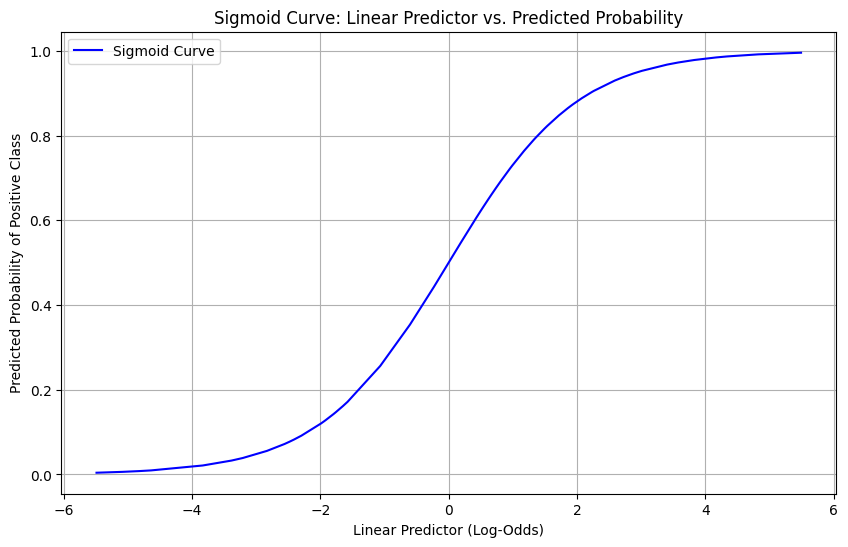

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(sorted_linear_predictor, sorted_predicted_probabilities, color='blue', label='Sigmoid Curve')
plt.xlabel('Linear Predictor (Log-Odds)')
plt.ylabel('Predicted Probability of Positive Class')
plt.title('Sigmoid Curve: Linear Predictor vs. Predicted Probability')
plt.grid(True)
plt.legend()
plt.show()

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(Y_test, predictions)

print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[19  9]
 [ 3 30]]


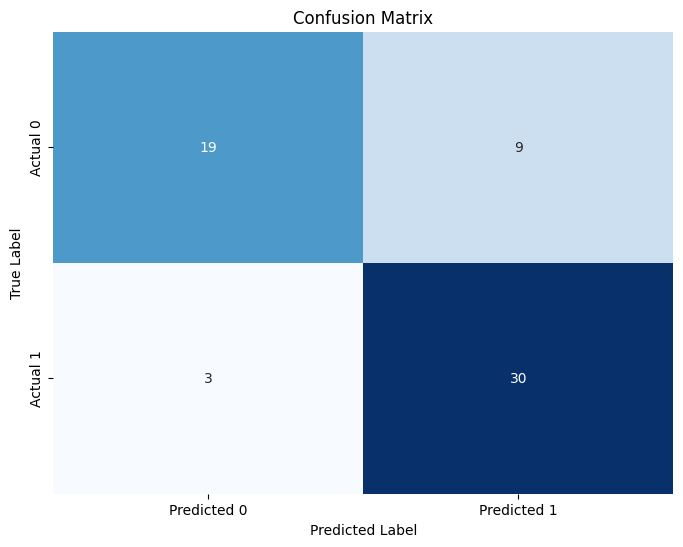

In [17]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [18]:
#find accuracy from the above confusion matrix
accuracy = (cm[0, 0] + cm[1, 1]) / np.sum(cm)
print("Accuracy:", accuracy)

Accuracy: 0.8032786885245902


In [19]:
#precision
precision = cm[1, 1] / (cm[0, 1] + cm[1, 1])
print("Precision:", precision)

Precision: 0.7692307692307693


In [20]:
#recall
recall = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print("Recall:", recall)

Recall: 0.9090909090909091


In [21]:
#specificity
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
print("Specificity:", specificity)

Specificity: 0.6785714285714286


In [22]:
#ROC curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(Y_test, y_prob[:, 1])
print(thresholds)


[       inf 0.99589537 0.95297947 0.94769544 0.93849673 0.93010865
 0.81663376 0.79580802 0.76454964 0.72934526 0.72244665 0.6752563
 0.63021606 0.62249643 0.54726115 0.44322179 0.25621637 0.08233329
 0.07731919 0.00412443]


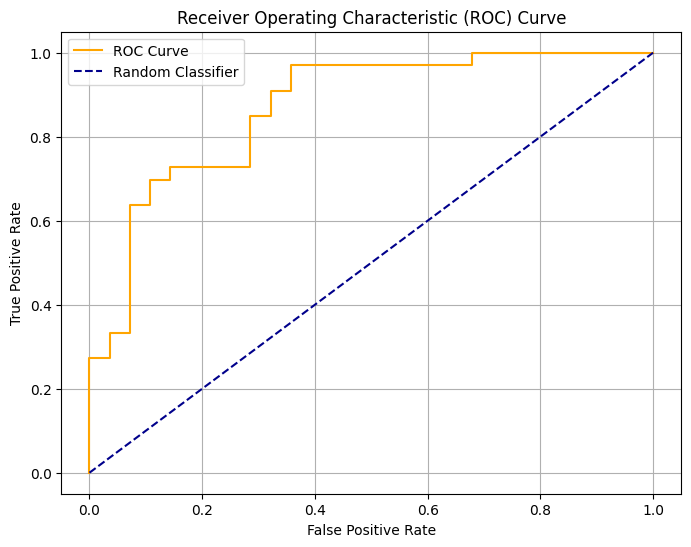

In [23]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

Optimal threshold (Youden's J statistic): 0.2562
TPR at optimal threshold: 0.9697
FPR at optimal threshold: 0.3571


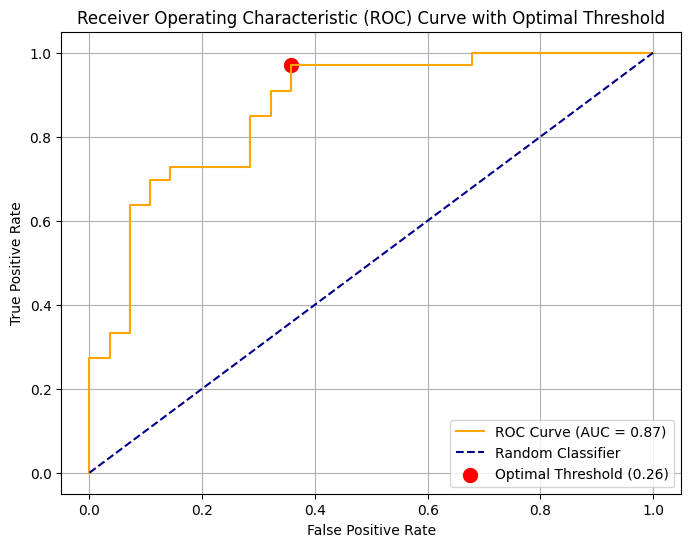

In [28]:
# Calculate Youden's J statistic
J = tpr - fpr
optimal_threshold_index = np.argmax(J)
optimal_threshold = thresholds[optimal_threshold_index]

print(f"Optimal threshold (Youden's J statistic): {optimal_threshold:.4f}")
print(f"TPR at optimal threshold: {tpr[optimal_threshold_index]:.4f}")
print(f"FPR at optimal threshold: {fpr[optimal_threshold_index]:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label=f'ROC Curve (AUC = {auc:.2f})') # Added AUC to label
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Random Classifier')
plt.scatter(fpr[optimal_threshold_index], tpr[optimal_threshold_index], color='red', marker='o', s=100, label=f'Optimal Threshold ({optimal_threshold:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve with Optimal Threshold')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
#AUC
auc = roc_auc_score(Y_test, y_prob[:, 1])
print("AUC:", auc)

AUC: 0.8690476190476191


In [26]:
from sklearn.metrics import roc_auc_score

# Calculate AUC again for clarity
auc = roc_auc_score(Y_test, y_prob[:, 1])
print(f"Area Under the Curve (AUC): {auc:.4f}")

Area Under the Curve (AUC): 0.8690


In [27]:
# The AUC is a single scalar value derived from the ROC curve, not a curve itself.
# The ROC curve was previously plotted (e.g., in cell 'U_5vx6SLkcqi'), and the AUC value was calculated and printed (e.g., in cell 'vgHWpWVcml62').
# There is no separate 'AUC curve' to plot.
print("The AUC (Area Under the Curve) is a single scalar value, not a curve that can be plotted.")
print("The ROC curve has already been plotted to visualize the model's performance across different thresholds.")
print("The calculated AUC value was previously: ", auc)


The AUC (Area Under the Curve) is a single scalar value, not a curve that can be plotted.
The ROC curve has already been plotted to visualize the model's performance across different thresholds.
The calculated AUC value was previously:  0.8690476190476191


In [ ]:
#numpy library matrix basics
ma = np.array([[1, 2, 3], [4, 5, 6]])
print(ma)

[[1 2 3]
 [4 5 6]]


In [ ]:
print(np.sum(ma))

21


In [ ]:
print(np.shape(ma))

(2, 3)


In [ ]:
#find precision
precision = cm[1, 1] / (cm[0, 1] + cm[1, 1])
print("Precision:", precision)

Precision: 0.7692307692307693


In [ ]:
#true positive rate.
recall = TP/TP+FN


### Insights from Visualizing the Sigmoid Curve

The visualization of the sigmoid curve demonstrates the fundamental relationship between the linear predictor (log-odds) and the predicted probability of the positive class in a logistic regression model. Key insights include:

1.  **S-Shape Characteristic**: The plot clearly shows the characteristic S-shape of the sigmoid function. This indicates that as the linear predictor (which is a linear combination of features and coefficients) increases, the predicted probability of the positive class smoothly transitions from values close to 0 to values close to 1.

2.  **Probability Interpretation**: The y-axis represents the predicted probability of the heart disease (target=1). For very low (negative) linear predictor values, the probability is near 0, suggesting a low likelihood of heart disease. Conversely, for very high (positive) linear predictor values, the probability approaches 1, indicating a high likelihood of heart disease.

3.  **Decision Boundary**: The steepest part of the S-curve is typically around the point where the linear predictor is 0. At this point, the predicted probability is 0.5. This region represents the decision boundary where small changes in the linear predictor lead to the largest changes in predicted probability, making it a critical area for classification.

4.  **Model's Certainty**: The flatter ends of the sigmoid curve show that for extreme positive or negative linear predictor values, the model is very confident in its prediction (either very low or very high probability). The model becomes less certain, and the probabilities are more sensitive to changes in the linear predictor, around the 0.5 probability mark.

5.  **Interpretation of Log-Odds**: The x-axis, the linear predictor, represents the log-odds of the positive class. A positive log-odds means the odds of the positive class are greater than 1 (i.e., probability > 0.5), while a negative log-odds means the odds are less than 1 (probability < 0.5).

## Final Task

### Subtask:
Summarize the insights gained from visualizing the sigmoid curve in the context of the logistic regression model's predictions.


## Summary:

### Q&A
**What insights were gained from visualizing the sigmoid curve in the context of the logistic regression model's predictions?**
The visualization of the sigmoid curve reveals several key insights into the logistic regression model's predictions:
*   **S-Shape Characteristic**: The plot distinctly shows the characteristic S-shape, illustrating how the predicted probability of the positive class smoothly transitions from near 0 to near 1 as the linear predictor (log-odds) increases.
*   **Probability Interpretation**: Low (negative) linear predictor values correspond to predicted probabilities close to 0, indicating a low likelihood of the positive class (e.g., heart disease), while high (positive) linear predictor values correspond to probabilities approaching 1, indicating a high likelihood.
*   **Decision Boundary**: The steepest part of the S-curve, typically around a linear predictor of 0 (where probability is 0.5), represents the decision boundary. Here, small changes in the linear predictor result in the largest changes in predicted probability, highlighting its criticality for classification.
*   **Model's Certainty**: The flatter ends of the sigmoid curve indicate high model confidence for extreme linear predictor values (probabilities very close to 0 or 1). The model's certainty decreases, and probabilities become more sensitive to predictor changes, near the 0.5 probability mark.
*   **Interpretation of Log-Odds**: The x-axis represents the log-odds of the positive class. Positive log-odds mean the odds of the positive class are greater than 1 (probability > 0.5), while negative log-odds mean the odds are less than 1 (probability < 0.5).

### Data Analysis Key Findings
*   The linear predictor (log-odds) for the test data was successfully calculated using the trained logistic regression model's coefficients and intercept.
*   The predicted probabilities for the positive class were extracted and, along with the linear predictor, were sorted to prepare for the sigmoid curve visualization.
*   A plot was generated that clearly depicted the S-shaped relationship between the sorted linear predictor values and their corresponding sorted predicted probabilities, visually confirming the logistic regression model's characteristic function.

### Insights or Next Steps
*   Understanding the sigmoid curve's behavior is crucial for interpreting logistic regression predictions, especially around the decision boundary where the model's sensitivity to feature changes is highest.
*   Further analysis could involve plotting the distribution of linear predictor values for different classes to understand how well they are separated by the model, potentially identifying areas of misclassification.


# Task
Introduce how to create and define matrices (NumPy arrays) in Python, demonstrate basic matrix arithmetic (addition, subtraction, element-wise multiplication), explain and show how to perform matrix multiplication using the dot product, illustrate matrix transposition, show how to reshape matrices to different dimensions, and finally, summarize the performed matrix operations and their applications.

## Introduction to NumPy Matrices

### Subtask:
Introduce how to create and define matrices (NumPy arrays) in Python.


**Reasoning**:
The first instruction is to import the NumPy library, commonly aliased as `np`. This is a prerequisite for creating NumPy arrays.



In [ ]:
import numpy as np
print("NumPy library imported as np.")

NumPy library imported as np.


**Reasoning**:
Now that NumPy is imported, I will proceed to demonstrate the creation of various types of NumPy arrays (matrices) as specified in the instructions, including 1D, 2D, zero-filled, one-filled, and identity matrices. For each, I will also print its content and shape.



In [ ]:
print("\n--- Creating NumPy Arrays ---")

# 2. Create a 1-dimensional NumPy array (vector) from a Python list.
vector = np.array([1, 2, 3, 4, 5])
print("\n1-D Array (Vector):")
print(vector)
print("Shape of vector:", vector.shape)

# 3. Create a 2-dimensional NumPy array (matrix) from a Python list of lists.
matrix_2d = np.array([[10, 20, 30], [40, 50, 60]])
print("\n2-D Array (Matrix):")
print(matrix_2d)
print("Shape of matrix_2d:", matrix_2d.shape)

# 4. Create a 3x3 matrix filled with zeros using np.zeros().
zeros_matrix = np.zeros((3, 3))
print("\n3x3 Zeros Matrix:")
print(zeros_matrix)
print("Shape of zeros_matrix:", zeros_matrix.shape)

# 5. Create a 2x4 matrix filled with ones using np.ones().
ones_matrix = np.ones((2, 4))
print("\n2x4 Ones Matrix:")
print(ones_matrix)
print("Shape of ones_matrix:", ones_matrix.shape)

# 6. Create a 3x3 identity matrix using np.eye().
identity_matrix = np.eye(3)
print("\n3x3 Identity Matrix:")
print(identity_matrix)
print("Shape of identity_matrix:", identity_matrix.shape)



--- Creating NumPy Arrays ---

1-D Array (Vector):
[1 2 3 4 5]
Shape of vector: (5,)

2-D Array (Matrix):
[[10 20 30]
 [40 50 60]]
Shape of matrix_2d: (2, 3)

3x3 Zeros Matrix:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Shape of zeros_matrix: (3, 3)

2x4 Ones Matrix:
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]]
Shape of ones_matrix: (2, 4)

3x3 Identity Matrix:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Shape of identity_matrix: (3, 3)


In [ ]:
identity_matrix = np.eye(3)
print("\n3x3 Identity Matrix:")
print(identity_matrix)
print("Shape of identity_matrix:", identity_matrix.shape)


3x3 Identity Matrix:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Shape of identity_matrix: (3, 3)


In [ ]:
ones_matrix = np.ones((2, 4))
print("\n2x4 Ones Matrix:")
print(ones_matrix)
print("Shape of ones_matrix:", ones_matrix.shape)


2x4 Ones Matrix:
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]]
Shape of ones_matrix: (2, 4)


In [ ]:
zeros_matrix = np.zeros((3, 3))
print("\n3x3 Zeros Matrix:")
print(zeros_matrix)
print("Shape of zeros_matrix:", zeros_matrix.shape)


3x3 Zeros Matrix:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Shape of zeros_matrix: (3, 3)


## Basic Matrix Arithmetic

### Subtask:
Demonstrate basic arithmetic operations on matrices, such as addition, subtraction, and element-wise multiplication.


**Reasoning**:
To demonstrate basic matrix arithmetic operations, I will create two sample 2x3 matrices using NumPy, then perform addition, subtraction, and element-wise multiplication on them, and print the result of each operation as specified in the instructions.



In [ ]:
print("\n--- Basic Matrix Arithmetic Operations ---")

# 1. Create two sample 2x3 matrices
matrix_a = np.array([[1, 2, 3], [4, 5, 6]])
matrix_b = np.array([[7, 8, 9], [10, 11, 12]])

print("\nMatrix A:\n", matrix_a)
print("Matrix B:\n", matrix_b)

# 2. Perform matrix addition
matrix_sum = matrix_a + matrix_b
print("\nMatrix Addition (A + B):\n", matrix_sum)

# 3. Perform matrix subtraction
matrix_difference = matrix_a - matrix_b
print("\nMatrix Subtraction (A - B):\n", matrix_difference)

# 4. Perform element-wise multiplication
matrix_elementwise_product = matrix_a * matrix_b
print("\nElement-wise Multiplication (A * B):\n", matrix_elementwise_product)


--- Basic Matrix Arithmetic Operations ---

Matrix A:
 [[1 2 3]
 [4 5 6]]
Matrix B:
 [[ 7  8  9]
 [10 11 12]]

Matrix Addition (A + B):
 [[ 8 10 12]
 [14 16 18]]

Matrix Subtraction (A - B):
 [[-6 -6 -6]
 [-6 -6 -6]]

Element-wise Multiplication (A * B):
 [[ 7 16 27]
 [40 55 72]]


## Matrix Multiplication (Dot Product)

### Subtask:
Explain and show how to perform matrix multiplication using the dot product.


**Reasoning**:
To explain and show how to perform matrix multiplication using the dot product, I will create two compatible matrices, perform the dot product operation, and then print the results along with their shapes as specified in the instructions.



In [ ]:
print("\n--- Matrix Multiplication (Dot Product) ---")

# 2. Create two sample matrices compatible for dot product
matrix_c = np.array([[1, 2, 3], [4, 5, 6]]) # 2x3 matrix
matrix_d = np.array([[7, 8], [9, 10], [11, 12]]) # 3x2 matrix

print("\nMatrix C (2x3):\n", matrix_c)
print("Matrix D (3x2):\n", matrix_d)

# 4. Perform matrix multiplication using the @ operator
matrix_product = matrix_c @ matrix_d
# Alternatively, using np.dot():
# matrix_product = np.dot(matrix_c, matrix_d)

print("\nMatrix Multiplication (C @ D):\n", matrix_product)
print("Shape of matrix_product:", matrix_product.shape)


--- Matrix Multiplication (Dot Product) ---

Matrix C (2x3):
 [[1 2 3]
 [4 5 6]]
Matrix D (3x2):
 [[ 7  8]
 [ 9 10]
 [11 12]]

Matrix Multiplication (C @ D):
 [[ 58  64]
 [139 154]]
Shape of matrix_product: (2, 2)


**Reasoning**:
Now that matrix multiplication has been demonstrated, I will proceed to illustrate matrix transposition as per the next instruction in the subtask. I will create a sample matrix, perform its transpose, and then print both the original and transposed matrices along with their shapes.



In [ ]:
print("\n--- Matrix Transposition ---")

# 2. Create a sample matrix
matrix_e = np.array([[1, 2, 3], [4, 5, 6]])

print("\nOriginal Matrix E:\n", matrix_e)
print("Shape of original Matrix E:", matrix_e.shape)

# 3. Perform matrix transposition
matrix_e_transposed = matrix_e.T
# Alternatively, using np.transpose():
# matrix_e_transposed = np.transpose(matrix_e)

print("\nTransposed Matrix E:\n", matrix_e_transposed)
print("Shape of transposed Matrix E:", matrix_e_transposed.shape)


--- Matrix Transposition ---

Original Matrix E:
 [[1 2 3]
 [4 5 6]]
Shape of original Matrix E: (2, 3)

Transposed Matrix E:
 [[1 4]
 [2 5]
 [3 6]]
Shape of transposed Matrix E: (3, 2)


**Reasoning**:
Following the task, I will now demonstrate how to reshape matrices to different dimensions. I will create a sample matrix, reshape it to a new compatible dimension, and then print both the original and reshaped matrices along with their shapes.



In [ ]:
print("Reshaping Matrices ---")

# 2. Create a sample 1D array
matrix_f = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

print("\nOriginal 1D Array F:", matrix_f)
print("Shape of original Array F:", matrix_f.shape)

# 3. Reshape the 1D array into a 3x4 matrix
reshaped_matrix_f_3x4 = matrix_f.reshape(3, 4)
print("\nReshaped Array F (3x4):", reshaped_matrix_f_3x4)
print("Shape of reshaped Array F (3x4):", reshaped_matrix_f_3x4.shape)

# 4. Reshape the 1D array into a 4x3 matrix
reshaped_matrix_f_4x3 = matrix_f.reshape(4, 3)
print("\nReshaped Array F (4x3):", reshaped_matrix_f_4x3)
print("Shape of reshaped Array F (4x3):", reshaped_matrix_f_4x3.shape)

# 5. Reshape into a 2x6 matrix
reshaped_matrix_f_2x6 = matrix_f.reshape(2, 6)
print("\nReshaped Array F (2x6):", reshaped_matrix_f_2x6)
print("Shape of reshaped Array F (2x6):", reshaped_matrix_f_2x6.shape)

# 6. Reshape into a 2D array, inferring one dimension using -1
reshaped_matrix_f_inferred = matrix_f.reshape(3, -1)
print("\nReshaped Array F (3x-1):, reshaped_matrix_f_inferred")
print("Shape of reshaped Array F (3x-1):", reshaped_matrix_f_inferred.shape)


Reshaping Matrices ---

Original 1D Array F: [ 1  2  3  4  5  6  7  8  9 10 11 12]
Shape of original Array F: (12,)

Reshaped Array F (3x4): [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
Shape of reshaped Array F (3x4): (3, 4)

Reshaped Array F (4x3): [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
Shape of reshaped Array F (4x3): (4, 3)

Reshaped Array F (2x6): [[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]]
Shape of reshaped Array F (2x6): (2, 6)

Reshaped Array F (3x-1):, reshaped_matrix_f_inferred
Shape of reshaped Array F (3x-1): (3, 4)


**Reasoning**:
The previous code block failed due to a `SyntaxError: unterminated string literal` because of an unescaped newline character within a string literal. I will fix the print statements to correctly format the strings with newline characters.



In [ ]:
print("\n--- Reshaping Matrices ---")

# 2. Create a sample 1D array
matrix_f = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

print("\nOriginal 1D Array F:", matrix_f)
print("Shape of original Array F:", matrix_f.shape)

# 3. Reshape the 1D array into a 3x4 matrix
reshaped_matrix_f_3x4 = matrix_f.reshape(3, 4)
print("\nReshaped Array F (3x4):\n", reshaped_matrix_f_3x4)
print("Shape of reshaped Array F (3x4):", reshaped_matrix_f_3x4.shape)

# 4. Reshape the 1D array into a 4x3 matrix
reshaped_matrix_f_4x3 = matrix_f.reshape(4, 3)
print("\nReshaped Array F (4x3):\n", reshaped_matrix_f_4x3)
print("Shape of reshaped Array F (4x3):", reshaped_matrix_f_4x3.shape)

# 5. Reshape into a 2x6 matrix
reshaped_matrix_f_2x6 = matrix_f.reshape(2, 6)
print("\nReshaped Array F (2x6):\n", reshaped_matrix_f_2x6)
print("Shape of reshaped Array F (2x6):", reshaped_matrix_f_2x6.shape)

# 6. Reshape into a 2D array, inferring one dimension using -1
reshaped_matrix_f_inferred = matrix_f.reshape(3, -1)
print("\nReshaped Array F (3x-1):\n", reshaped_matrix_f_inferred)
print("Shape of reshaped Array F (3x-1):", reshaped_matrix_f_inferred.shape)


--- Reshaping Matrices ---

Original 1D Array F: [ 1  2  3  4  5  6  7  8  9 10 11 12]
Shape of original Array F: (12,)

Reshaped Array F (3x4):
 [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
Shape of reshaped Array F (3x4): (3, 4)

Reshaped Array F (4x3):
 [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
Shape of reshaped Array F (4x3): (4, 3)

Reshaped Array F (2x6):
 [[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]]
Shape of reshaped Array F (2x6): (2, 6)

Reshaped Array F (3x-1):
 [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
Shape of reshaped Array F (3x-1): (3, 4)


## Summary of Matrix Operations

Throughout this section, we have explored several fundamental matrix operations using the NumPy library in Python. These operations are essential for various data science, machine learning, and mathematical computations.

### Matrix Creation and Definition
We began by learning how to create NumPy arrays, which serve as matrices in Python. This included:
*   **1-D Arrays (Vectors):** `np.array([1, 2, 3])`
*   **2-D Arrays (Matrices):** `np.array([[1, 2, 3], [4, 5, 6]])`
*   **Special Matrices:** Creating matrices filled with zeros (`np.zeros()`), ones (`np.ones()`), and identity matrices (`np.eye()`).

These methods allow for flexible initialization of matrices based on specific needs.

### Basic Matrix Arithmetic
We demonstrated basic element-wise arithmetic operations, which are straightforward in NumPy due to broadcasting capabilities:
*   **Addition:** `matrix_a + matrix_b` (adds corresponding elements)
*   **Subtraction:** `matrix_a - matrix_b` (subtracts corresponding elements)
*   **Element-wise Multiplication:** `matrix_a * matrix_b` (multiplies corresponding elements)

These operations are crucial for tasks like scaling data, combining feature sets, or adjusting model parameters.

### Matrix Multiplication (Dot Product)
Unlike element-wise multiplication, matrix multiplication follows specific rules and is fundamental to linear algebra. We performed this using:
*   **`@` operator:** `matrix_c @ matrix_d`
*   **`np.dot()` function:** `np.dot(matrix_c, matrix_d)`

Matrix multiplication is vital for calculations in neural networks, transformations in computer graphics, and solving systems of linear equations.

### Matrix Transposition
Transposition involves flipping a matrix over its diagonal, swapping row and column indices. We achieved this using:
*   **`.T` attribute:** `matrix_e.T`
*   **`np.transpose()` function:** `np.transpose(matrix_e)`

Transposition is used in various algorithms, such as calculating covariance matrices, preparing data for certain model inputs, and in the process of matrix inversion.

### Reshaping Matrices
Reshaping allows us to change the dimensions of a matrix while keeping its data. This is particularly useful for preparing data for different model architectures or visualization purposes. We used:
*   **`.reshape()` method:** `matrix_f.reshape(rows, columns)`

Reshaping is commonly employed to flatten images for machine learning models, prepare time-series data, or adjust feature vectors to fit specific function signatures.

### Applications
The matrix operations demonstrated are foundational for:
*   **Linear Algebra:** Solving systems of equations, eigenvalue decomposition, etc.
*   **Data Analysis:** Data manipulation, statistical modeling, feature engineering.
*   **Machine Learning:** Implementing algorithms (e.g., linear regression, logistic regression, neural networks), optimizing models, data preprocessing.
*   **Computer Graphics:** Transformations (scaling, rotation, translation) of objects.

Understanding and effectively utilizing these NumPy matrix operations are critical skills for anyone working with numerical data in Python.

## Final Task

### Subtask:
Summarize the performed matrix operations and their applications.


## Summary:

### Data Analysis Key Findings

*   **Matrix Creation and Definition**: NumPy arrays were successfully used to create 1-D vectors (e.g., `[1, 2, 3, 4, 5]` with shape `(5,)`), 2-D matrices (e.g., `[[10, 20, 30], [40, 50, 60]]` with shape `(2, 3)`), and special matrices such as 3x3 zero matrices, 2x4 one matrices, and 3x3 identity matrices.
*   **Basic Matrix Arithmetic**:
    *   **Addition**: For `matrix_a = [[1, 2, 3], [4, 5, 6]]` and `matrix_b = [[7, 8, 9], [10, 11, 12]]`, their sum was `[[ 8 10 12], [14 16 18]]`.
    *   **Subtraction**: The difference `matrix_a - matrix_b` yielded `[[-6 -6 -6], [-6 -6 -6]]`.
    *   **Element-wise Multiplication**: The element-wise product `matrix_a * matrix_b` resulted in `[[ 7 16 27], [40 55 72]]`.
*   **Matrix Multiplication (Dot Product)**: The dot product of a 2x3 matrix `matrix_c = [[1, 2, 3], [4, 5, 6]]` and a 3x2 matrix `matrix_d = [[7, 8], [9, 10], [11, 12]]` was successfully calculated as `[[ 58 64], [139 154]]` with a resulting shape of `(2, 2)`.
*   **Matrix Transposition**: A 2x3 matrix `matrix_e = [[1, 2, 3], [4, 5, 6]]` was transposed to `[[1 4], [2 5], [3 6]]`, correctly changing its shape to `(3, 2)`.
*   **Matrix Reshaping**: A 1-D array of 12 elements was successfully reshaped into various 2-D forms, including a 3x4 matrix, a 4x3 matrix, a 2x6 matrix, and a 3x4 matrix by inferring one dimension using `-1`.
*   **Applications**: The demonstrated matrix operations are fundamental in linear algebra, data analysis, machine learning (e.g., neural networks, linear regression), and computer graphics (e.g., transformations).

### Insights or Next Steps

*   The flexibility and efficiency of NumPy for matrix operations are clearly demonstrated, highlighting its importance for numerical computations in Python, especially for large datasets.
*   Further exploration could involve demonstrating more advanced matrix operations such as inverse, determinant, eigenvalues/eigenvectors, and solving linear equations, which build upon these foundational operations.
